In [1]:
import pandas as pd
import numpy as np

# Load raw heart dataset
raw_path = "../data/raw/heart_raw.csv"
df = pd.read_csv(raw_path)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [3]:
df = df.rename(columns={
    "age": "Age", 
    "anaemia": "Anaemia",
    "creatinine_phosphokinase": "CPK",
    "diabetes": "Diabetes",
    "ejection_fraction": "EjectionFraction",
    "high_blood_pressure": "HighBP",
    "platelets": "Platelets",
    "serum_creatinine": "SerumCreatinine",
    "serum_sodium": "SerumSodium",
    "sex": "Sex",
    "smoking": "Smoking",
    "DEATH_EVENT": "DeathEvent"
})

df.head()

,Age,Anaemia,CPK,Diabetes,EjectionFraction,HighBP,Platelets,SerumCreatinine,SerumSodium,Sex,Smoking,time,DeathEvent
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Remove extreme outliers using medical IQR rule
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ["CPK", "Platelets", "SerumCreatinine", "SerumSodium"]:
    df = remove_outliers(df, col)

df.shape

(225, 13)

In [5]:
df["Sex"].value_counts()

Sex
1    144
0     81
Name: count, dtype: int64

In [6]:
clean_path = "../data/processed/heart_clean.csv"
df.to_csv(clean_path, index=False)

clean_path

'../data/processed/heart_clean.csv'

In [7]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,225.0,60.739262,11.965897,40.0,50.0,60.0,70.0,95.0
Anaemia,225.0,0.466667,0.500000,0.0,0.0,0.0,1.0,1.0
CPK,225.0,338.031111,279.374547,30.0,115.0,212.0,582.0,1202.0
Diabetes,225.0,0.417778,0.494293,0.0,0.0,0.0,1.0,1.0
EjectionFraction,225.0,38.364444,12.012664,14.0,30.0,38.0,45.0,80.0
HighBP,225.0,0.377778,0.485913,0.0,0.0,0.0,1.0,1.0
Platelets,225.0,255898.491556,67005.546603,122000.0,210000.0,263000.0,297000.0,427000.0
SerumCreatinine,225.0,1.128800,0.327080,0.6,0.9,1.1,1.3,2.1
SerumSodium,225.0,137.044444,3.798235,125.0,134.0,137.0,140.0,148.0
Sex,225.0,0.640000,0.481070,0.0,0.0,1.0,1.0,1.0


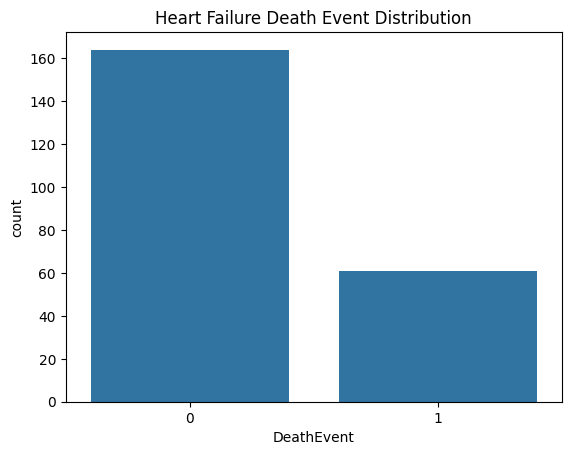

DeathEvent
0    0.728889
1    0.271111
Name: proportion, dtype: float64

In [8]:
# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["DeathEvent"])
plt.title("Heart Failure Death Event Distribution")
plt.show()

df["DeathEvent"].value_counts(normalize=True)

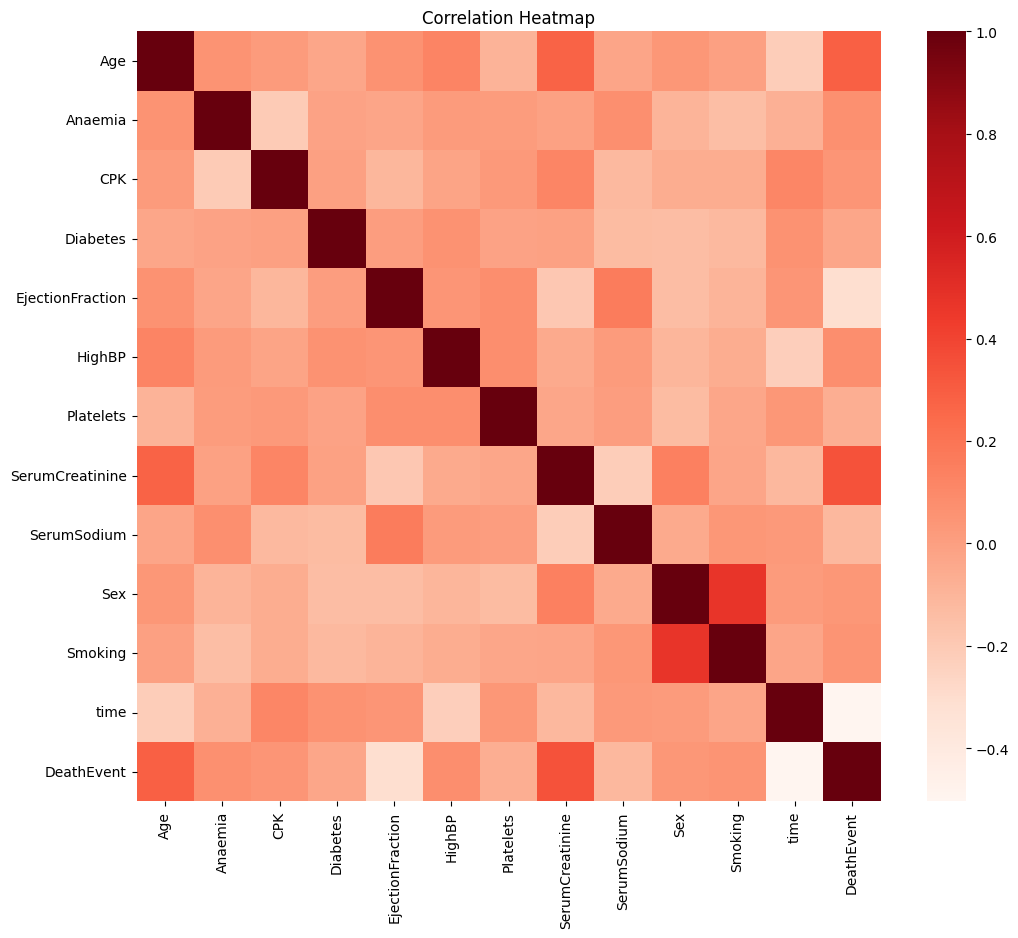

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

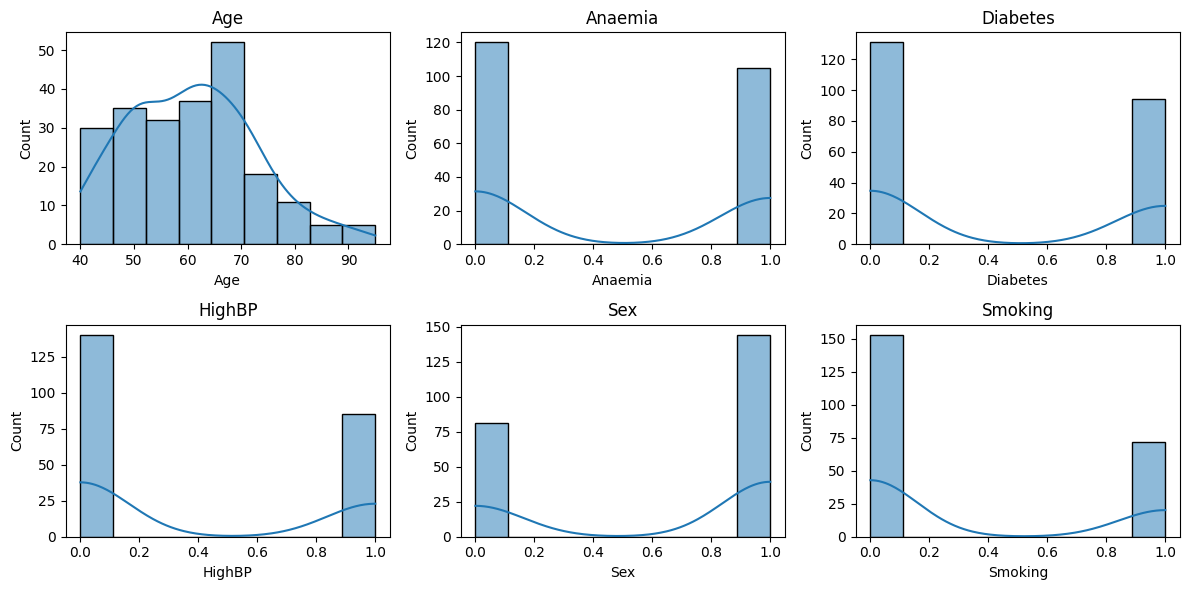

In [10]:
medical_cols = ["Age", "Anaemia", "Diabetes", "HighBP", "Sex", "Smoking"]

plt.figure(figsize=(12,6))
for i, col in enumerate(medical_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

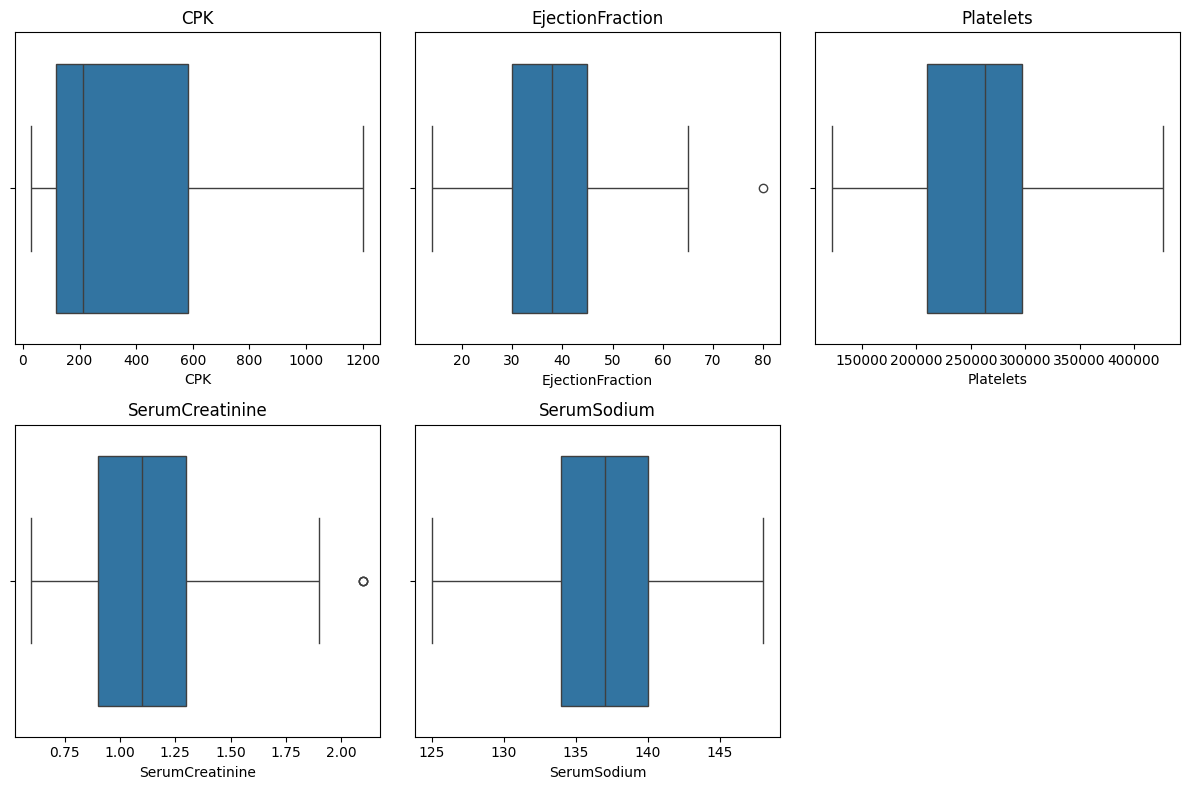

In [11]:
clinical_cols = ["CPK", "EjectionFraction", "Platelets", "SerumCreatinine", "SerumSodium"]

plt.figure(figsize=(12,8))
for i, col in enumerate(clinical_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

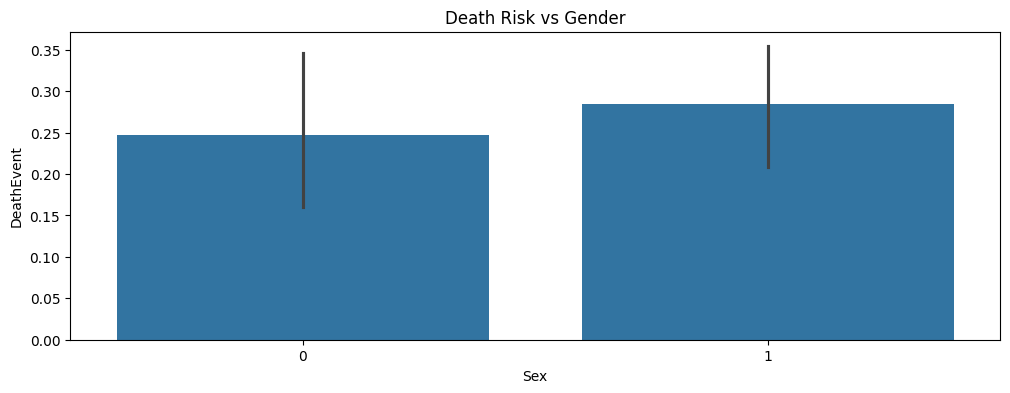

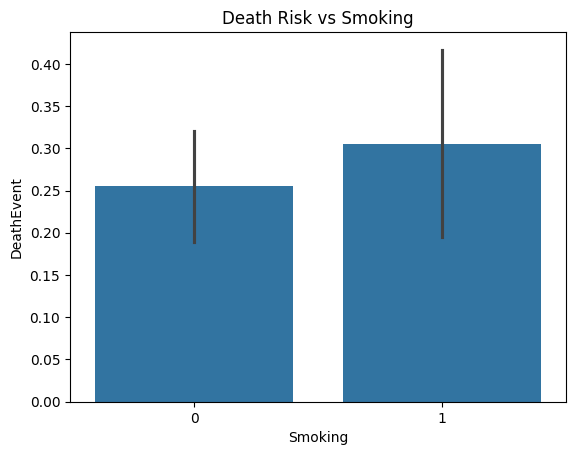

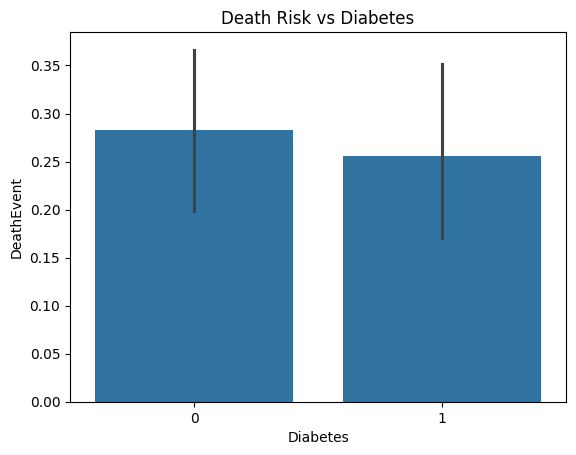

In [12]:
import numpy as np

plt.figure(figsize=(12,4))
sns.barplot(x="Sex", y="DeathEvent", data=df, estimator=np.mean)
plt.title("Death Risk vs Gender")
plt.show()

sns.barplot(x="Smoking", y="DeathEvent", data=df, estimator=np.mean)
plt.title("Death Risk vs Smoking")
plt.show()

sns.barplot(x="Diabetes", y="DeathEvent", data=df, estimator=np.mean)
plt.title("Death Risk vs Diabetes")
plt.show()

In [13]:
df.corr()["DeathEvent"].sort_values(ascending=False)

DeathEvent          1.000000
SerumCreatinine     0.347812
Age                 0.284359
HighBP              0.081570
Anaemia             0.070810
Smoking             0.053154
CPK                 0.046308
Sex                 0.040825
Diabetes           -0.030093
Platelets          -0.066240
SerumSodium        -0.112678
EjectionFraction   -0.306324
time               -0.504077
Name: DeathEvent, dtype: float64

In [14]:
import pandas as pd

df = pd.read_csv("../data/processed/heart_clean.csv")
df.head()

,Age,Anaemia,CPK,Diabetes,EjectionFraction,HighBP,Platelets,SerumCreatinine,SerumSodium,Sex,Smoking,time,DeathEvent
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
3,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
4,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [15]:
X = df.drop("DeathEvent", axis=1)
y = df["DeathEvent"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((180, 12), (45, 12))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import pickle

with open("../models_saved/heart_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(class_weight="balanced", max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

pred_lr = log_reg.predict(X_test_scaled)
print("LR Accuracy:", accuracy_score(y_test, pred_lr))
print("LR F1:", f1_score(y_test, pred_lr))

LR Accuracy: 0.7777777777777778
LR F1: 0.5454545454545454


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_scaled, y_train)

pred_rf = rf.predict(X_test_scaled)
print("RF Accuracy:", accuracy_score(y_test, pred_rf))
print("RF F1:", f1_score(y_test, pred_rf))

RF Accuracy: 0.8222222222222222
RF F1: 0.6


In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

xgb.fit(X_train_scaled, y_train)

pred_xgb = xgb.predict(X_test_scaled)
print("XGB Accuracy:", accuracy_score(y_test, pred_xgb))
print("XGB F1:", f1_score(y_test, pred_xgb))

XGB Accuracy: 0.8666666666666667
XGB F1: 0.7272727272727273


In [22]:
print("LR F1:", f1_score(y_test, pred_lr))
print("RF F1:", f1_score(y_test, pred_rf))
print("XGB F1:", f1_score(y_test, pred_xgb))

LR F1: 0.5454545454545454
RF F1: 0.6
XGB F1: 0.7272727272727273


In [23]:
with open("../models_saved/heart_xgboost.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [31]:
import pandas as pd
import pickle

df = pd.read_csv("../data/processed/heart_clean.csv")

# Load model
with open("../models_saved/heart_xgboost.pkl", "rb") as f:
    model = pickle.load(f)

In [32]:
features = [
    "Age", "Anaemia", "CPK", "Diabetes", "EjectionFraction",
    "HighBP", "Platelets", "SerumCreatinine", "SerumSodium",
    "Sex", "Smoking", "time"
]

X = df[features]

In [33]:
with open("../models_saved/heart_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

X_scaled = scaler.transform(X)

In [34]:
import shap
shap.initjs()

# NEW API → returns Explanation object
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_scaled)

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("../visualizations/heart/heart_shap_beeswarm.png", dpi=300, bbox_inches="tight")
plt.close()

In [36]:
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values.values, X, show=False)
plt.savefig("../visualizations/heart/heart_shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

In [37]:
import numpy as np

importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
11,time,0.212635
7,SerumCreatinine,0.125321
4,EjectionFraction,0.118787
0,Age,0.100363
10,Smoking,0.073194
5,HighBP,0.060087
3,Diabetes,0.059543
6,Platelets,0.056828
8,SerumSodium,0.053870
2,CPK,0.051913


In [38]:
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Heart Failure Model – Feature Importance")
plt.xlabel("Importance Score")
plt.savefig("../visualizations/heart/heart_feature_importance.png", dpi=300, bbox_inches="tight")
plt.close()